In [29]:
#!pip install matplotlib

In [8]:
import pandas as pd

In [14]:
samples_df = pd.read_csv('./../../data/samples.csv')# damos el formato correcto al campo datetime
samples_df['datetime'] = pd.to_datetime(samples_df['datetime'])

In [16]:
samples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685070 entries, 0 to 1685069
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   sample_id   1685070 non-null  int64         
 1   sample_tag  1685070 non-null  object        
 2   datetime    1685070 non-null  datetime64[ns]
 3   vehicle_id  1685070 non-null  object        
 4   lap         1685070 non-null  int64         
 5   latitude    1685070 non-null  float64       
 6   longitude   1685070 non-null  float64       
 7   navigation  1685070 non-null  int64         
 8   id_point    1685070 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 115.7+ MB


### Extraer Sample para My Maps

In [17]:
one_sample = samples_df[samples_df['sample_id'] == 0]
one_sample = one_sample.sort_values(by='datetime')
one_sample

,sample_id,sample_tag,datetime,vehicle_id,lap,latitude,longitude,navigation,id_point
366,0,2023-03-01 SJ39 1,2023-03-01 05:05:12,SJ39,1,-13.555726,-71.856056,303,13173244
377,0,2023-03-01 SJ39 1,2023-03-01 05:05:24,SJ39,1,-13.555219,-71.856794,305,13173248
388,0,2023-03-01 SJ39 1,2023-03-01 05:05:44,SJ39,1,-13.554692,-71.857518,303,13173255
417,0,2023-03-01 SJ39 1,2023-03-01 05:05:56,SJ39,1,-13.554171,-71.858327,302,13173261
363,0,2023-03-01 SJ39 1,2023-03-01 05:06:08,SJ39,1,-13.553682,-71.859570,284,13173266
...,...,...,...,...,...,...,...,...,...
301,0,2023-03-01 SJ39 1,2023-03-01 07:12:25,SJ39,1,-13.553942,-71.858960,109,13187884
124,0,2023-03-01 SJ39 1,2023-03-01 07:12:37,SJ39,1,-13.554810,-71.857447,124,13187918
396,0,2023-03-01 SJ39 1,2023-03-01 07:12:49,SJ39,1,-13.555622,-71.856283,123,13187969
252,0,2023-03-01 SJ39 1,2023-03-01 07:14:38,SJ39,1,-13.555519,-71.855775,339,13188295


In [ ]:
# one_sample.to_csv(f'./../../data/samples/{one_sample.loc[0, 'sample_tag']}.csv', index=False)

### Analisis de cantidad de puntos por SAMPLE

In [19]:
cantidad_puntos = []
for n, points_df in samples_df.groupby(by='sample_id'):
    cantidad_puntos.append(points_df.shape[0])

In [21]:
import numpy as np

# Calcular los cuartiles
q1, q2, q3 = np.percentile(cantidad_puntos, [25, 50, 75])

# Contar los valores en cada rango
rango1 = sum(1 for x in cantidad_puntos if x <= q1)
rango2 = sum(1 for x in cantidad_puntos if q1 < x <= q2)
rango3 = sum(1 for x in cantidad_puntos if q2 < x <= q3)
rango4 = sum(1 for x in cantidad_puntos if x > q3)

# Mostrar los resultados
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")
print(f"Rango 1 (<= Q1): {rango1} valores")
print(f"Rango 2 (Q1 < x <= Q2): {rango2} valores")
print(f"Rango 3 (Q2 < x <= Q3): {rango3} valores")
print(f"Rango 4 (> Q3): {rango4} valores")

Q1: 175.0, Q2: 421.0, Q3: 455.0
Rango 1 (<= Q1): 1256 valores
Rango 2 (Q1 < x <= Q2): 1275 valores
Rango 3 (Q2 < x <= Q3): 1278 valores
Rango 4 (> Q3): 1206 valores


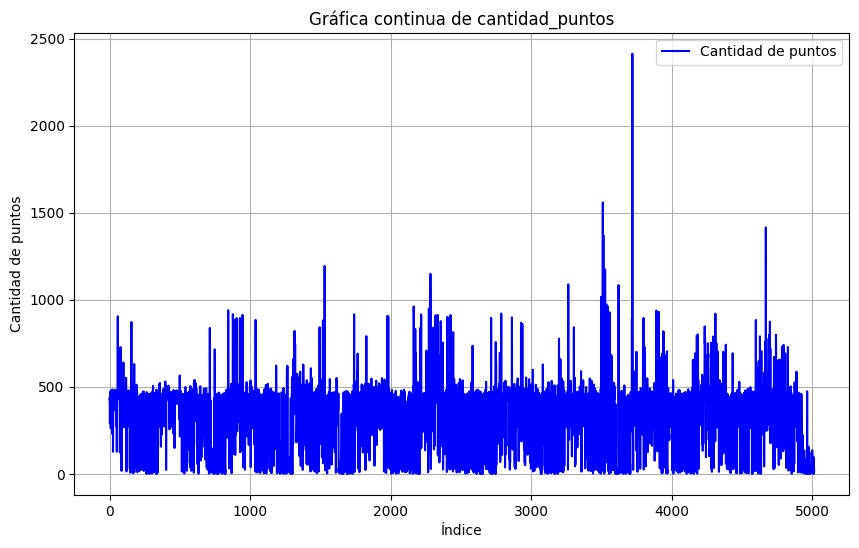

In [26]:
import matplotlib.pyplot as plt

# Crear la gráfica continua
plt.figure(figsize=(10, 6))
plt.plot(cantidad_puntos, label='Cantidad de puntos', color='blue')
plt.title('Gráfica continua de cantidad_puntos')
plt.xlabel('Índice')
plt.ylabel('Cantidad de puntos')
plt.legend()
plt.grid()
plt.show()

In [31]:
print(f'valores menores a 156: {sum(1 for x in cantidad_puntos if x > 156)}') 
print(f'valores mayores a 500: {sum(1 for x in cantidad_puntos if x < 500)}') 

valores menores a 156: 3802
valores mayores a 500: 4640
